In [ ]:
!pip install imblearn

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode
import scipy
from scipy import stats, signal
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/before_merge/aftermerge_ecg/"

In [ ]:
# files = ['result_ecg_data05_interpo.csv',
#  'result_ecg_data06_interpo.csv',
#  'result_ecg_data07_interpo.csv',
#  'result_ecg_data08_interpo.csv',
#  'result_ecg_data09_interpo.csv']

In [ ]:
# Hyper Params
fs = 16
length = 2 * fs
stride = length
p = 0.5

In [ ]:
  df = pd.read_csv("/content/drive/MyDrive/before_merge/aftermerge_ecg/aftermerge_ecg_data05_interpo.csv")
  columns = df.columns.tolist()
  columns[-1], columns[1] = columns[1], columns[-1]
  df = df[columns]

In [ ]:
df = df.drop('label_2', axis=1)


In [ ]:
from statistics import mode  # Import the mode function from the statistics module

X = []
y = []
full_dfs = list()

for file in os.listdir(path):
    print(file)
    df = pd.read_csv(path + file)
    columns = df.columns.tolist()
    columns[-1], columns[1] = columns[1], columns[-1]
    df = df[columns]



    # Drop the original second last column
    df = df.drop('label_2', axis=1)
    df=df.dropna()

    finaldfs = list()

    # Windowing parameters
    window_length = 2  # seconds
    for i in range(0, len(df), stride):
        # Check if there are values in the window before calculating mode
        window_values = df[df.columns[-1]].iloc[i:i+length]
        if not window_values.empty:
            annotation = mode(window_values)
            int_dfs = list()
            for j in range(2):
                window = df[df.columns[j]].iloc[i:i+length]
                int_dfs.append(window)
            int_df = pd.DataFrame(pd.concat(int_dfs, axis=0, ignore_index=True)).T
            int_df['annotation'] = annotation
            finaldfs.append(int_df)

    finaldf = pd.concat(finaldfs, axis=0)
    full_dfs.append(finaldf)

last_df = pd.concat(full_dfs, axis=0).reset_index(drop=True).dropna(how='any')

In [ ]:
last_df = pd.concat(full_dfs, axis=0).reset_index(drop=True).dropna(how='any')

In [ ]:
last_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,annotation
0,0.311135,0.310026,0.307692,0.304151,0.299429,0.293560,0.286587,0.278557,0.269526,0.259553,...,77.110378,77.110897,77.111416,77.111934,77.112453,77.112972,77.113491,77.114010,77.114528,1
1,-0.043965,-0.052518,-0.060205,-0.067005,-0.072902,-0.077887,-0.081959,-0.085120,-0.087381,-0.088758,...,77.126979,77.127498,77.128017,77.128536,77.129055,77.129573,77.130092,77.130611,77.131130,1
2,0.030651,0.037504,0.044144,0.050548,0.056697,0.062578,0.068180,0.073496,0.078525,0.083268,...,77.143581,77.144100,77.144619,77.145137,77.145656,77.146175,77.146694,77.147213,77.147731,1
3,0.157498,0.161607,0.165923,0.170441,0.175150,0.180038,0.185092,0.190299,0.195644,0.201112,...,77.160182,77.160701,77.161220,77.161739,77.162258,77.162776,77.163295,77.163814,77.164333,1
4,0.276660,0.274548,0.271845,0.268556,0.264686,0.260246,0.255246,0.249695,0.243606,0.237009,...,77.176784,77.177303,77.177822,77.178340,77.178859,77.179378,77.179897,77.180416,77.180934,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665980,-0.092263,-0.077852,-0.062761,-0.047070,-0.030856,-0.014205,0.002799,0.020067,0.037508,0.055026,...,58.105924,58.102254,58.098585,58.094916,58.091246,58.087577,58.083908,58.080238,58.076569,1
665981,0.278993,0.275372,0.270539,0.264532,0.257394,0.249175,0.239931,0.229723,0.218620,0.206691,...,57.988505,57.984836,57.981166,57.977497,57.973828,57.970158,57.966489,57.962820,57.959150,1
665982,-0.100660,-0.107678,-0.113736,-0.118822,-0.122936,-0.126078,-0.128255,-0.129480,-0.129765,-0.129137,...,57.871086,57.867417,57.863748,57.860078,57.856409,57.852740,57.849071,57.845401,57.841732,1
665983,0.025742,0.033377,0.040723,0.047757,0.054457,0.060808,0.066796,0.072414,0.077658,0.082527,...,57.753668,57.749999,57.746329,57.742660,57.738991,57.735321,57.731652,57.727983,57.724313,1


In [ ]:
last_df.to_csv('/content/drive/MyDrive/before_merge/aftermerge_ecg/last_df.csv',index=False)

In [ ]:
last_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,annotation
5,0.198087,0.184031,0.169589,0.154849,0.139903,0.124841,0.109753,0.094728,0.079853,0.065211,...,77.117641,77.118160,77.118679,77.119197,77.119716,77.120235,77.120754,77.121273,77.121791,77.105709
6,-0.083304,-0.079996,-0.076051,-0.071517,-0.066448,-0.060897,-0.054918,-0.048568,-0.041901,-0.034974,...,77.134243,77.134761,77.135280,77.135799,77.136318,77.136837,77.137355,77.137874,77.138393,77.122310
7,0.103006,0.106262,0.109334,0.112250,0.115038,0.117733,0.120369,0.122982,0.125602,0.128260,...,77.150844,77.151363,77.151882,77.152401,77.152919,77.153438,77.153957,77.154476,77.154994,77.138912
8,0.229155,0.234646,0.240009,0.245203,0.250174,0.254875,0.259264,0.263304,0.266968,0.270220,...,77.167446,77.167964,77.168483,77.169002,77.169521,77.170040,77.170558,77.171077,77.171596,77.155513
9,0.197392,0.188364,0.179054,0.169508,0.159771,0.149887,0.139907,0.129881,0.119855,0.109870,...,77.184047,77.184566,77.185085,77.185604,77.186122,77.186641,77.187160,77.187679,77.188198,77.172115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666109,-0.181487,-0.185899,-0.189455,-0.192099,-0.193779,-0.194452,-0.194085,-0.192644,-0.190108,-0.186468,...,58.175641,58.171972,58.168302,58.164633,58.160964,58.157294,58.153625,58.149956,58.146286,58.260036
666110,0.123891,0.140307,0.156208,0.171502,0.186099,0.199915,0.212872,0.224896,0.235921,0.245885,...,58.058222,58.054553,58.050884,58.047214,58.043545,58.039876,58.036206,58.032537,58.028868,58.142617
666111,0.152312,0.137471,0.122308,0.106912,0.091374,0.075784,0.060238,0.044837,0.029671,0.014821,...,57.940804,57.937134,57.933465,57.929796,57.926126,57.922457,57.918788,57.915118,57.911449,58.025198
666112,-0.118282,-0.113707,-0.108486,-0.102673,-0.096321,-0.089487,-0.082227,-0.074599,-0.066659,-0.058466,...,57.823385,57.819716,57.816047,57.812377,57.808708,57.805039,57.801369,57.797700,57.794031,57.907780


In [ ]:
last_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,annotation
0,0.147669,-0.009659,-0.145465,-0.142151,-0.096633,-0.089881,-0.004437,0.107718,0.050294,0.049954,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,1.0
1,-0.185126,-0.158119,-0.108466,-0.079673,0.019740,0.054435,0.016469,0.088967,0.128469,-0.023468,...,85.416667,87.500000,89.583333,91.666667,93.750000,95.833333,97.916667,100.000000,95.138889,1.0
2,-0.051428,-0.150439,-0.137191,-0.121100,-0.095299,-0.033016,0.087340,0.191683,0.112207,-0.001431,...,69.230769,69.674556,70.118343,70.562130,71.005917,71.449704,71.893491,72.337278,72.781065,1.0
3,-0.050514,0.010147,0.043255,0.101051,0.182820,0.117479,-0.043750,-0.103629,-0.095130,-0.096987,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.568182,76.136364,76.704545,1.0
4,-0.133018,-0.100024,-0.058578,-0.057969,0.010663,0.097673,0.072411,0.109677,0.184362,0.081606,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22952,0.065013,0.091937,0.034042,-0.032993,-0.059140,-0.049617,-0.007241,0.031778,0.025722,0.045362,...,112.500000,112.500000,112.500000,112.500000,112.500000,112.500000,112.500000,109.687500,106.875000,5.0
22953,-0.069859,-0.053389,-0.006832,0.051179,0.074863,0.093468,0.072778,0.000880,-0.042844,-0.054380,...,75.086505,77.854671,80.622837,83.391003,86.159170,88.927336,91.695502,94.463668,97.231834,5.0
22954,0.111290,0.015176,-0.074492,-0.095293,-0.046974,0.004765,-0.024411,-0.011521,0.094088,0.121086,...,94.444444,93.333333,92.222222,91.111111,90.000000,91.000000,92.000000,93.000000,94.000000,5.0
22955,-0.034905,-0.002455,-0.038618,-0.036165,0.065423,0.106121,0.022065,-0.062359,-0.081499,-0.071016,...,90.000000,91.000000,92.000000,93.000000,94.000000,95.000000,96.000000,97.000000,98.000000,5.0


In [ ]:
data = last_df.copy(deep=True)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,annotation
0,0.311135,0.310026,0.307692,0.304151,0.299429,0.293560,0.286587,0.278557,0.269526,0.259553,...,77.110378,77.110897,77.111416,77.111934,77.112453,77.112972,77.113491,77.114010,77.114528,1
1,-0.043965,-0.052518,-0.060205,-0.067005,-0.072902,-0.077887,-0.081959,-0.085120,-0.087381,-0.088758,...,77.126979,77.127498,77.128017,77.128536,77.129055,77.129573,77.130092,77.130611,77.131130,1
2,0.030651,0.037504,0.044144,0.050548,0.056697,0.062578,0.068180,0.073496,0.078525,0.083268,...,77.143581,77.144100,77.144619,77.145137,77.145656,77.146175,77.146694,77.147213,77.147731,1
3,0.157498,0.161607,0.165923,0.170441,0.175150,0.180038,0.185092,0.190299,0.195644,0.201112,...,77.160182,77.160701,77.161220,77.161739,77.162258,77.162776,77.163295,77.163814,77.164333,1
4,0.276660,0.274548,0.271845,0.268556,0.264686,0.260246,0.255246,0.249695,0.243606,0.237009,...,77.176784,77.177303,77.177822,77.178340,77.178859,77.179378,77.179897,77.180416,77.180934,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665980,-0.092263,-0.077852,-0.062761,-0.047070,-0.030856,-0.014205,0.002799,0.020067,0.037508,0.055026,...,58.105924,58.102254,58.098585,58.094916,58.091246,58.087577,58.083908,58.080238,58.076569,1
665981,0.278993,0.275372,0.270539,0.264532,0.257394,0.249175,0.239931,0.229723,0.218620,0.206691,...,57.988505,57.984836,57.981166,57.977497,57.973828,57.970158,57.966489,57.962820,57.959150,1
665982,-0.100660,-0.107678,-0.113736,-0.118822,-0.122936,-0.126078,-0.128255,-0.129480,-0.129765,-0.129137,...,57.871086,57.867417,57.863748,57.860078,57.856409,57.852740,57.849071,57.845401,57.841732,1
665983,0.025742,0.033377,0.040723,0.047757,0.054457,0.060808,0.066796,0.072414,0.077658,0.082527,...,57.753668,57.749999,57.746329,57.742660,57.738991,57.735321,57.731652,57.727983,57.724313,1


In [ ]:
win_len = 16 * 2

In [ ]:
def _xlogx(x, base=2):
    x = np.asarray(x)
    xlogx = np.zeros(x.shape)
    xlogx[x < 0] = np.nan
    valid = x > 0
    xlogx[valid] = x[valid] * np.log(x[valid]) / np.log(base)
    return xlogx

def spectral_entropy(x):
    x = np.asarray(x)
    # Compute and normalize power spectrum
    _, psd = scipy.signal.periodogram(x, 16)

    psd_norm = psd / psd.sum(axis=0, keepdims=True)
    se = -_xlogx(psd_norm).sum(axis=0)
    # if normalize:
    #     se /= np.log2(psd_norm.shape[0])
    return se

In [ ]:
def feature_mean(row):
    row = np.array(row)
    row = row[:-1]
    row = np.reshape(row, (2, win_len))
    return (pd.Series(np.mean(x, axis = 0) for x in row))


def feature_stddev(row):
    row = np.array(row)
    row = row[:-1]
    row = np.reshape(row, (2, win_len))
    return (pd.Series(np.std(x, axis = 0) for x in row))


def kurtosis(row):
    row = np.array(row)
    annotation = row[-1]
    row = row[:-1]
    row = np.reshape(row, (2, win_len))
    return (pd.Series(scipy.stats.kurtosis(x, axis = 0, bias = False) for x in row))

def skewness(row):
    row = np.array(row)
    row = row[:-1]
    row = np.reshape(row, (2, win_len))
    return (pd.Series(scipy.stats.skew(x, axis = 0, bias = False) for x in row))


def psd(row):
    row = np.array(row)
    row = row[:-1]
    row = np.reshape(row, (2, win_len))
    return (pd.Series(spectral_entropy(x) for x in row))


In [ ]:
!pip install pyhrv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=236594 sha256=925c680e99971fa777eaf3306fa86ff05c0e2a1272f3ccd86cce1837c54c1864
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64213 sha256=e0e494396f6a8a498ef5dfaff3b5ec54c4e3ccad3e33ef4c3f0959e423d7dfd7
  Stored in directory: /root/.cache/pip/wheels/c5/a3/df/e8e19f6f1674c2b0574ccc1a156292b599709eaa4feeea0fcf
Successfully built spectrum easydev


In [ ]:
def calculate_hrv(windowed_data):
    """
    Calculate HRV features from windowed data.

    Parameters:
    - windowed_data: DataFrame with 'ECG' and 'HR' columns.

    Returns:
    - Tuple of HRV features (SDNN, RMSSD).
    """
    row = np.array(windowed_data)
    row=row[:-1]
    row = row[-32:]

    # Calculate RR intervals (time between successive heartbeats)
    rr_intervals = np.diff(row)

    # Check if there are enough RR intervals for calculation
    if len(rr_intervals) > 1:
        # Calculate HRV metrics in the time domain using pyhrv
        sdnn = np.std(rr_intervals)
        rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals))))

        return pd.Series([sdnn, rmssd])
    else:
        # Not enough RR intervals for calculation
        return pd.Series([np.nan, np.nan])

In [ ]:
def detect_peaks(ecg_signal):
    # Assuming 'ecg_signal' is a single lead ECG signal
    r_peaks, _ = find_peaks(ecg_signal.iloc[:32], height=0.01, distance=30)
    q_peaks, _ = find_peaks(ecg_signal.iloc[:32], height=0.005, distance=20)
    s_peaks, _ = find_peaks(-(ecg_signal.iloc[:32]), height=0.005, distance=20)
    t_peaks, _ = find_peaks(ecg_signal.iloc[:32], height=0.005, distance=50)
    q_peak_feature = len(q_peaks)
    r_peak_feature = len(r_peaks)
    s_peak_feature = len(s_peaks)
    t_peak_feature = len(t_peaks)

    # Add detected peaks as features
    q_peak_positions = ",".join(map(str, q_peaks))
    r_peak_positions = ",".join(map(str, r_peaks))
    s_peak_positions = ",".join(map(str, s_peaks))
    t_peak_positions = ",".join(map(str, t_peaks))

    q_peak_positions = np.array(q_peaks)
    r_peak_positions = np.array(r_peaks)
    s_peak_positions = np.array(s_peaks)
    t_peak_positions = np.array(t_peaks)

    q_peak_mean = np.mean(q_peak_positions) if q_peak_positions.size > 0 else np.nan
    r_peak_mean = np.mean(r_peak_positions) if r_peak_positions.size > 0 else np.nan
    s_peak_mean = np.mean(s_peak_positions) if s_peak_positions.size > 0 else np.nan
    t_peak_mean = np.mean(t_peak_positions) if t_peak_positions.size > 0 else np.nan

    q_peak_std = np.std(q_peak_positions) if q_peak_positions.size > 0 else np.nan
    r_peak_std = np.std(r_peak_positions) if r_peak_positions.size > 0 else np.nan
    s_peak_std = np.std(s_peak_positions) if s_peak_positions.size > 0 else np.nan
    t_peak_std = np.std(t_peak_positions) if t_peak_positions.size > 0 else np.nan

    return pd.Series([q_peak_feature, r_peak_feature, s_peak_feature, t_peak_feature,
                  q_peak_mean, r_peak_mean, s_peak_mean, t_peak_mean,
                  q_peak_std, r_peak_std, s_peak_std, t_peak_std])

    #return pd.Series([q_peak_feature, r_peak_feature, s_peak_feature, t_peak_feature,
                      #q_peak_positions, r_peak_positions, s_peak_positions, t_peak_positions])
    #return q_peaks, r_peaks, s_peaks, t_peaks

def extract_peak_features(row, win_len):
    ecg_signal = np.array(row[:-1])  # Assuming the last column is the annotation
    preprocessed_ecg = preprocess_ecg(ecg_signal)
    q_peaks, r_peaks, s_peaks, t_peaks = detect_peaks(preprocessed_ecg)

    # Extract peak features as needed
    q_peak_feature = len(q_peaks)
    r_peak_feature = len(r_peaks)
    s_peak_feature = len(s_peaks)
    t_peak_feature = len(t_peaks)

    return pd.Series([q_peak_feature, r_peak_feature, s_peak_feature, t_peak_feature])

In [ ]:
list_of_feature_methods = [feature_mean, feature_stddev, skewness, psd, kurtosis, calculate_hrv]

In [ ]:
list_of_feature_methods=[calculate_hrv]

In [ ]:
df_list = []

for i, method in enumerate(list_of_feature_methods):
    print("Feature %d ..." % (i + 1))
    df_temp = data.apply(method, axis=1)
    df_list.append(df_temp.apply(lambda x: pd.Series(x) if isinstance(x, list) else x))

# Concatenate the list of DataFrames along axis 1 (columns)
new_df = pd.concat(df_list, axis=1)

Feature 1 ...
Feature 2 ...
Feature 3 ...
Feature 4 ...
Feature 5 ...
Feature 6 ...


In [ ]:
new_df

,0,1,0,1,0,1,0,1,0,1,0,1
0,0.162841,77.106487,0.114524,0.004790,-0.256873,-4.981066e-12,1.811896,2.101545,-1.367852,-1.2,7.012396e-15,1.322959e-14
1,-0.053272,77.123088,0.033939,0.004790,0.867024,-8.649119e-13,1.071602,2.101545,-0.405774,-1.2,7.012396e-15,1.297268e-14
2,0.101735,77.139690,0.034350,0.004790,-0.454554,-5.002494e-12,2.298443,2.101545,-0.797682,-1.2,7.012396e-15,1.322959e-14
3,0.230538,77.156291,0.041140,0.004790,-0.340077,-1.242533e-12,1.738422,2.101545,-1.350434,-1.2,7.012396e-15,1.297268e-14
4,0.173595,77.172893,0.077228,0.004790,-0.286112,-5.002494e-12,1.897652,2.101545,-1.292403,-1.2,7.012396e-15,1.322959e-14
...,...,...,...,...,...,...,...,...,...,...,...,...
665980,0.138215,58.133444,0.123982,0.033879,-0.428405,-3.087668e-13,1.811417,2.101545,-1.237997,-1.2,3.695857e-15,6.355287e-15
665981,0.106928,58.016025,0.122210,0.033879,-0.134901,-4.768026e-13,1.830163,2.101545,-1.409222,-1.2,3.695857e-15,6.486338e-15
665982,-0.082345,57.898606,0.046693,0.033879,0.815002,-7.866671e-14,1.447306,2.101545,-0.703420,-1.2,5.166071e-15,8.506753e-15
665983,0.095944,57.781188,0.030675,0.033879,-0.811165,2.242001e-13,2.280619,2.101545,-0.412458,-1.2,3.109120e-15,5.189070e-15


In [ ]:
feature_names = ["Feature_" + str(i+1) for i in range(new_df.shape[1])]
new_df.columns = feature_names

In [ ]:
new_df.to_csv("/content/drive/MyDrive/before_merge/aftermerge_ecg/features_new_df.csv",index=False)

In [ ]:
new_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
0,0.162841,77.106487,0.114524,0.004790,-0.256873,-4.981066e-12,1.811896,2.101545,-1.367852,-1.2,7.012396e-15,1.322959e-14
1,-0.053272,77.123088,0.033939,0.004790,0.867024,-8.649119e-13,1.071602,2.101545,-0.405774,-1.2,7.012396e-15,1.297268e-14
2,0.101735,77.139690,0.034350,0.004790,-0.454554,-5.002494e-12,2.298443,2.101545,-0.797682,-1.2,7.012396e-15,1.322959e-14
3,0.230538,77.156291,0.041140,0.004790,-0.340077,-1.242533e-12,1.738422,2.101545,-1.350434,-1.2,7.012396e-15,1.297268e-14
4,0.173595,77.172893,0.077228,0.004790,-0.286112,-5.002494e-12,1.897652,2.101545,-1.292403,-1.2,7.012396e-15,1.322959e-14
...,...,...,...,...,...,...,...,...,...,...,...,...
665980,0.138215,58.133444,0.123982,0.033879,-0.428405,-3.087668e-13,1.811417,2.101545,-1.237997,-1.2,3.695857e-15,6.355287e-15
665981,0.106928,58.016025,0.122210,0.033879,-0.134901,-4.768026e-13,1.830163,2.101545,-1.409222,-1.2,3.695857e-15,6.486338e-15
665982,-0.082345,57.898606,0.046693,0.033879,0.815002,-7.866671e-14,1.447306,2.101545,-0.703420,-1.2,5.166071e-15,8.506753e-15
665983,0.095944,57.781188,0.030675,0.033879,-0.811165,2.242001e-13,2.280619,2.101545,-0.412458,-1.2,3.109120e-15,5.189070e-15


In [ ]:
df_list = list()
for i, j in zip(list_of_feature_methods, range(len(list_of_feature_methods))):
    print("Feature %d ..." % (j+1))
    df_temp = data.apply(lambda row: i(row), axis = 1)
    df_list.append(df_temp)

new_df = pd.concat(df_list, axis = 1)
new_df

Feature 1 ...
Feature 2 ...
Feature 3 ...


,0,1,0,1,0
0,0.011394,90.000000,0.090432,0.000000,"([20, 47], [10, 47], [2, 23], [47])"
1,-0.004871,87.035590,0.099822,6.269050,"([8, 36, 62], [18, 62], [10], [8, 62])"
2,-0.016425,67.695942,0.097289,7.712761,"([7, 32, 63], [32, 63], [1, 26], [32])"
3,-0.001206,74.967851,0.102709,0.569950,"([4, 28, 63], [4, 63], [19], [4, 63])"
4,0.011130,77.343750,0.095319,2.354876,"([8, 40], [8, 40], [22], [40])"
...,...,...,...,...,...
22952,-0.004030,100.634766,0.068184,9.766464,"([11, 57], [11, 57], [4, 24], [1, 57])"
22953,0.004127,78.184168,0.055359,14.565465,"([5, 32, 63], [32, 63], [25], [32])"
22954,0.001500,97.500000,0.073149,3.454399,"([18, 41, 63], [9, 41], [15], [41])"
22955,-0.006662,96.593750,0.055757,3.160155,"([5, 41, 63], [5, 41], [8, 30], [41])"


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/before_merge/aftermerge_ecg/last_df.csv")

In [ ]:
new_df=pd.read_csv("/content/drive/MyDrive/before_merge/aftermerge_ecg/features_new_df.csv")

In [ ]:
new_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
0,0.162841,77.106487,0.114524,0.004790,-0.256873,-4.981066e-12,1.811896,2.101545,-1.367852,-1.2,7.012396e-15,1.322959e-14
1,-0.053272,77.123088,0.033939,0.004790,0.867024,-8.649119e-13,1.071602,2.101545,-0.405774,-1.2,7.012396e-15,1.297268e-14
2,0.101735,77.139690,0.034350,0.004790,-0.454554,-5.002494e-12,2.298443,2.101545,-0.797682,-1.2,7.012396e-15,1.322959e-14
3,0.230538,77.156291,0.041140,0.004790,-0.340077,-1.242533e-12,1.738422,2.101545,-1.350434,-1.2,7.012396e-15,1.297268e-14
4,0.173595,77.172893,0.077228,0.004790,-0.286112,-5.002494e-12,1.897652,2.101545,-1.292403,-1.2,7.012396e-15,1.322959e-14
...,...,...,...,...,...,...,...,...,...,...,...,...
665972,0.138215,58.133444,0.123982,0.033879,-0.428405,-3.087668e-13,1.811417,2.101545,-1.237997,-1.2,3.695857e-15,6.355287e-15
665973,0.106928,58.016025,0.122210,0.033879,-0.134901,-4.768026e-13,1.830163,2.101545,-1.409222,-1.2,3.695857e-15,6.486338e-15
665974,-0.082345,57.898606,0.046693,0.033879,0.815002,-7.866671e-14,1.447306,2.101545,-0.703420,-1.2,5.166071e-15,8.506753e-15
665975,0.095944,57.781188,0.030675,0.033879,-0.811165,2.242001e-13,2.280619,2.101545,-0.412458,-1.2,3.109120e-15,5.189070e-15


In [ ]:
data[data.columns[-1]]

0         1
1         1
2         1
3         1
4         1
         ..
665972    1
665973    1
665974    1
665975    1
665976    1
Name: annotation, Length: 665977, dtype: int64

In [ ]:
y=data[data.columns[-1]]

In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
665980    1
665981    1
665982    1
665983    1
665984    1
Name: annotation, Length: 665977, dtype: int64

In [ ]:
np.unique(y)

array([1, 3, 5])

In [ ]:
X = pd.DataFrame(X, columns=['Feature1', 'Feature2', ...])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
new_df_imputed = imputer.fit_transform(new_df)
new_df_imputed=pd.DataFrame(new_df_imputed,columns=['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9','Feature_10','Feature_11','Feature_12'])

In [ ]:
type(new_df_imputed)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(new_df_imputed, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({
    'Feature': new_df_imputed.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)

selected_features = feature_importance_df['Feature'].head(10).tolist()

# Use the selected features for further analysis or modeling
X_selected = new_df_imputed[selected_features]


       Feature  Importance
1    Feature_2    0.177909
0    Feature_1    0.148369
2    Feature_3    0.139337
3    Feature_4    0.133571
6    Feature_7    0.126951
4    Feature_5    0.118967
8    Feature_9    0.117646
7    Feature_8    0.008882
5    Feature_6    0.008346
9   Feature_10    0.007408
11  Feature_12    0.006455
10  Feature_11    0.006159


In [ ]:
X_selected

,Feature_2,Feature_1,Feature_3,Feature_4,Feature_7,Feature_5,Feature_9,Feature_8,Feature_6,Feature_10
0,77.106487,0.162841,0.114524,0.004790,1.811896,-0.256873,-1.367852,2.101545,-4.981066e-12,-1.2
1,77.123088,-0.053272,0.033939,0.004790,1.071602,0.867024,-0.405774,2.101545,-8.649119e-13,-1.2
2,77.139690,0.101735,0.034350,0.004790,2.298443,-0.454554,-0.797682,2.101545,-5.002494e-12,-1.2
3,77.156291,0.230538,0.041140,0.004790,1.738422,-0.340077,-1.350434,2.101545,-1.242533e-12,-1.2
4,77.172893,0.173595,0.077228,0.004790,1.897652,-0.286112,-1.292403,2.101545,-5.002494e-12,-1.2
...,...,...,...,...,...,...,...,...,...,...
665972,58.133444,0.138215,0.123982,0.033879,1.811417,-0.428405,-1.237997,2.101545,-3.087668e-13,-1.2
665973,58.016025,0.106928,0.122210,0.033879,1.830163,-0.134901,-1.409222,2.101545,-4.768026e-13,-1.2
665974,57.898606,-0.082345,0.046693,0.033879,1.447306,0.815002,-0.703420,2.101545,-7.866671e-14,-1.2
665975,57.781188,0.095944,0.030675,0.033879,2.280619,-0.811165,-0.412458,2.101545,2.242001e-13,-1.2


In [ ]:
feature_df = pd.concat([new_df, data[data.columns[-1]]], axis = 1)
feature_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,annotation
0,0.011394,90.000000,0.090432,0.000000,-1.096508,NaN,0.033781,NaN,2.310605,-0.000000,...,1.0,33.500000,28.5,12.5,47.0,13.500000,18.5,10.5,0.0,1.0
1,-0.004871,87.035590,0.099822,6.269050,-1.222641,-0.558917,0.002714,-0.107628,2.053396,1.013665,...,2.0,35.333333,40.0,10.0,35.0,22.050447,22.0,0.0,27.0,1.0
2,-0.016425,67.695942,0.097289,7.712761,-0.792802,1.373321,0.644767,0.989493,2.566823,1.881593,...,1.0,34.000000,47.5,13.5,32.0,22.905603,15.5,12.5,0.0,1.0
3,-0.001206,74.967851,0.102709,0.569950,-1.291032,4.951086,0.130479,-0.200819,1.604724,3.609780,...,2.0,31.666667,33.5,19.0,33.5,24.225790,29.5,0.0,29.5,1.0
4,0.011130,77.343750,0.095319,2.354876,-1.235112,-1.344538,0.101608,0.427144,1.915658,0.471204,...,1.0,24.000000,24.0,22.0,40.0,16.000000,16.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22952,-0.004030,100.634766,0.068184,9.766464,-0.058629,-1.864074,0.742155,0.075658,2.324815,0.724875,...,2.0,34.000000,34.0,14.0,29.0,23.000000,23.0,10.0,28.0,5.0
22953,0.004127,78.184168,0.055359,14.565465,-0.582901,-1.155221,0.517167,-0.009378,2.863513,0.223314,...,1.0,33.333333,47.5,25.0,32.0,23.697163,15.5,0.0,0.0,5.0
22954,0.001500,97.500000,0.073149,3.454399,-0.962491,-0.729197,0.465035,-0.966154,2.675066,1.235928,...,1.0,40.666667,25.0,15.0,41.0,18.372685,16.0,0.0,0.0,5.0
22955,-0.006662,96.593750,0.055757,3.160155,0.088899,-0.969943,0.779294,-0.516142,2.369547,0.868343,...,1.0,36.333333,23.0,19.0,41.0,23.907228,18.0,11.0,0.0,5.0


In [ ]:
selected_features_df = pd.concat([X_selected, data[data.columns[-1]]], axis = 1)
selected_features_df

,Feature_2,Feature_1,Feature_3,Feature_4,Feature_7,Feature_5,Feature_9,Feature_8,Feature_6,Feature_10,annotation
0,77.106487,0.162841,0.114524,0.00479,1.811896,-0.256873,-1.367852,2.101545,-4.981066e-12,-1.2,1.0
1,77.123088,-0.053272,0.033939,0.00479,1.071602,0.867024,-0.405774,2.101545,-8.649119e-13,-1.2,1.0
2,77.139690,0.101735,0.034350,0.00479,2.298443,-0.454554,-0.797682,2.101545,-5.002494e-12,-1.2,1.0
3,77.156291,0.230538,0.041140,0.00479,1.738422,-0.340077,-1.350434,2.101545,-1.242533e-12,-1.2,1.0
4,77.172893,0.173595,0.077228,0.00479,1.897652,-0.286112,-1.292403,2.101545,-5.002494e-12,-1.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
665980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
665981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
665982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
665983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
selected_features_df.dropna()

,Feature_2,Feature_1,Feature_3,Feature_4,Feature_7,Feature_5,Feature_9,Feature_8,Feature_6,Feature_10,annotation
0,77.106487,0.162841,0.114524,0.004790,1.811896,-0.256873,-1.367852,2.101545,-4.981066e-12,-1.2,1.0
1,77.123088,-0.053272,0.033939,0.004790,1.071602,0.867024,-0.405774,2.101545,-8.649119e-13,-1.2,1.0
2,77.139690,0.101735,0.034350,0.004790,2.298443,-0.454554,-0.797682,2.101545,-5.002494e-12,-1.2,1.0
3,77.156291,0.230538,0.041140,0.004790,1.738422,-0.340077,-1.350434,2.101545,-1.242533e-12,-1.2,1.0
4,77.172893,0.173595,0.077228,0.004790,1.897652,-0.286112,-1.292403,2.101545,-5.002494e-12,-1.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...
665972,58.133444,0.138215,0.123982,0.033879,1.811417,-0.428405,-1.237997,2.101545,-3.087668e-13,-1.2,1.0
665973,58.016025,0.106928,0.122210,0.033879,1.830163,-0.134901,-1.409222,2.101545,-4.768026e-13,-1.2,1.0
665974,57.898606,-0.082345,0.046693,0.033879,1.447306,0.815002,-0.703420,2.101545,-7.866671e-14,-1.2,1.0
665975,57.781188,0.095944,0.030675,0.033879,2.280619,-0.811165,-0.412458,2.101545,2.242001e-13,-1.2,1.0


In [ ]:
X_train, X_test = selected_features_df.iloc[: int(len(selected_features_df)*0.8)], selected_features_df.iloc[int(len(selected_features_df)*0.8) : ]
y_train, y_test = feature_df["annotation"][: int(len(selected_features_df)*0.8)], feature_df["annotation"][int(len(selected_features_df)*0.8) :]

Correlation Matrix with Output:
            Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1    1.000000  -0.009388   0.509698   0.002364  -0.470602   0.056816   
Feature_2   -0.009388   1.000000   0.028633   0.209317  -0.004566  -0.086625   
Feature_3    0.509698   0.028633   1.000000  -0.000490  -0.102147   0.013904   
Feature_4    0.002364   0.209317  -0.000490   1.000000   0.004659  -0.012466   
Feature_5   -0.470602  -0.004566  -0.102147   0.004659   1.000000  -0.011008   
Feature_6    0.056816  -0.086625   0.013904  -0.012466  -0.011008   1.000000   
Feature_7    0.364528   0.050688   0.469331  -0.000951  -0.049997   0.006320   
Feature_8   -0.119074  -0.111117   0.054969   0.070307   0.082886   0.067233   
Feature_9   -0.189738  -0.020101  -0.409368  -0.001248   0.190734  -0.001813   
Feature_10   0.133627   0.013935   0.049745  -0.039116  -0.081431   0.116172   
Feature_11   0.243273   0.075650   0.032065   0.134917  -0.187449  -0.018749   
Feature_

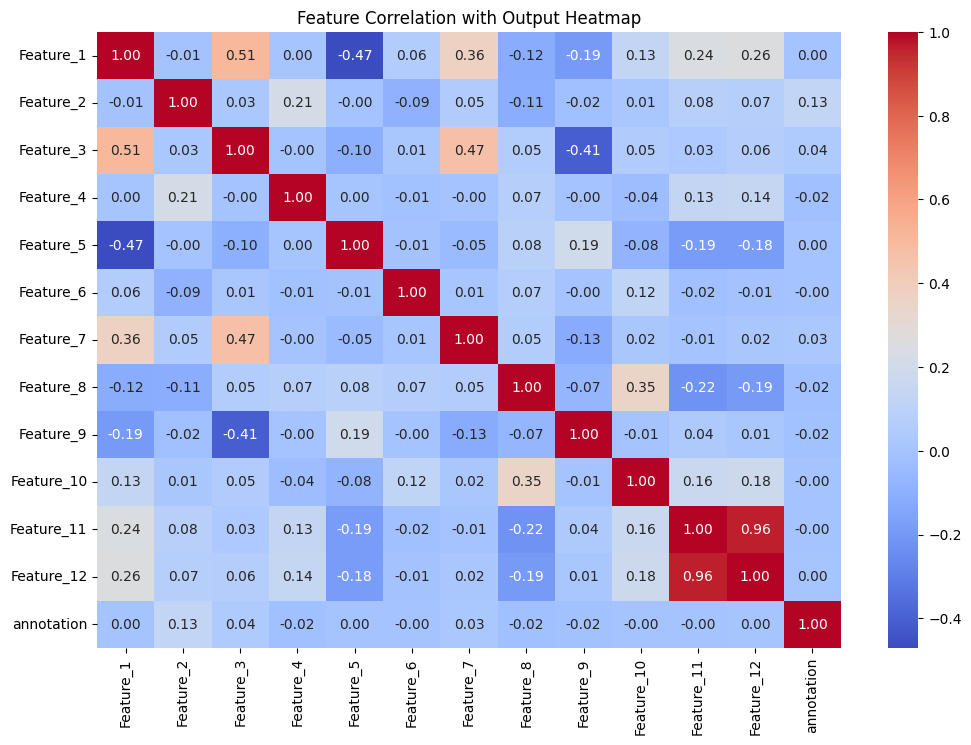

In [ ]:
data_with_output = pd.concat([new_df, y], axis=1)


correlation_matrix = data_with_output.corr()

# Print the correlation matrix
print("Correlation Matrix with Output:")
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Output Heatmap")
plt.show()

In [ ]:
X_train, X_test = new_df.iloc[: int(len(new_df)*0.8)], new_df.iloc[int(len(new_df)*0.8) : ]
y_train, y_test = data["annotation"][: int(len(new_df)*0.8)], data["annotation"][int(len(new_df)*0.8) :]

In [ ]:
X_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12
0,0.162841,77.106487,0.114524,0.004790,-0.256873,-4.981066e-12,1.811896,2.101545,-1.367852,-1.200000,7.012396e-15,1.322959e-14
1,-0.053272,77.123088,0.033939,0.004790,0.867024,-8.649119e-13,1.071602,2.101545,-0.405774,-1.200000,7.012396e-15,1.297268e-14
2,0.101735,77.139690,0.034350,0.004790,-0.454554,-5.002494e-12,2.298443,2.101545,-0.797682,-1.200000,7.012396e-15,1.322959e-14
3,0.230538,77.156291,0.041140,0.004790,-0.340077,-1.242533e-12,1.738422,2.101545,-1.350434,-1.200000,7.012396e-15,1.297268e-14
4,0.173595,77.172893,0.077228,0.004790,-0.286112,-5.002494e-12,1.897652,2.101545,-1.292403,-1.200000,7.012396e-15,1.322959e-14
...,...,...,...,...,...,...,...,...,...,...,...,...
532776,-0.042823,87.668128,0.100471,0.163451,0.262808,-9.597620e-14,1.876454,2.101545,-1.321565,-1.200000,4.201440e-15,6.355287e-15
532777,0.158344,87.101639,0.036019,0.163451,-0.990994,2.718196e-13,1.097094,2.101545,-0.030224,-1.200000,4.763985e-15,6.355287e-15
532778,-0.022771,86.535151,0.033991,0.163451,1.080504,8.972029e-14,1.245696,2.101545,0.151735,-1.200000,4.201440e-15,6.355287e-15
532779,0.151604,85.968662,0.095569,0.163451,-0.075443,1.167250e-13,1.947650,2.101545,-1.333670,-1.200000,4.201440e-15,6.355287e-15


In [ ]:
d = pd.concat([X_train, y_train], axis = 1)

In [ ]:
print(y_train.value_counts(normalize = True), '\n')
print(ytrain.value_counts(normalize = True))
print(len(y_train))
print(len(ytrain))

5.0    0.440680
1.0    0.361477
3.0    0.197843
Name: annotation, dtype: float64 

1.0    0.333333
5.0    0.333333
3.0    0.333333
Name: annotation, dtype: float64
18358
24270


In [ ]:
y_test

18365    1.0
18366    1.0
18367    1.0
18368    1.0
18369    1.0
        ... 
22952    5.0
22953    5.0
22954    5.0
22955    5.0
22956    5.0
Name: annotation, Length: 4590, dtype: float64

In [ ]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 543.9 kB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

In [ ]:
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train_encoded)
X_t,Y_t = smote.fit_resample(X_test_imputed, y_test_encoded)

# Instantiate a classifier (for example, RandomForestClassifier)
classifier = RandomForestClassifier()

# Train the classifier on the imputed training data
classifier.fit(X_resampled, y_resampled)

# Make predictions on the imputed test data
y_pred_rf = classifier.predict(X_t)

# Evaluate the classifier
accuracy = accuracy_score(Y_t, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.6835719934712009


In [ ]:
from sklearn.metrics import classification_report
print("Accuracy:", accuracy)
print(classification_report(Y_t, y_pred_rf))

Accuracy: 0.6835719934712009
              precision    recall  f1-score   support

           0       0.68      0.72      0.70     59429
           1       0.66      0.63      0.65     59429
           2       0.70      0.70      0.70     59429

    accuracy                           0.68    178287
   macro avg       0.68      0.68      0.68    178287
weighted avg       0.68      0.68      0.68    178287



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming 'new_df' is your feature matrix and 'y' is your target variable
# Replace 'new_df' and 'y' with your actual data

# Label encode the target variable 'y'
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)

# Convert the data to DMatrix format (XGBoost's internal format)


In [ ]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_train_encoded)

array([0, 1, 2])

In [ ]:
y_train = y_train.astype(int) - 1

In [ ]:
y_test=y_test.astype(int)-1

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
18360    0
18361    0
18362    0
18363    0
18364    0
Name: annotation, Length: 18358, dtype: int64

## xgboost,all features,imputed,smote

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score

# Assuming you have your X_train and y_train datasets

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
}

# Define the scoring metric (you can change this to other metrics like 'f1', 'precision', 'recall', etc.)
scoring_metric = make_scorer(accuracy_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring_metric, cv=5)

# Fit the model with grid search
grid_search.fit(X_train_imputed,y_train_encoded)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_imputed)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)

# You can also print other evaluation metrics if needed
# For example, classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

In [ ]:
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_imputed)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)

# You can also print other evaluation metrics if needed
# For example, classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

Test Accuracy: 0.4570806100217865
              precision    recall  f1-score   support

           0       0.52      0.33      0.40      1951
           1       0.00      0.00      0.00       815
           2       0.43      0.80      0.56      1824

    accuracy                           0.46      4590
   macro avg       0.32      0.38      0.32      4590
weighted avg       0.39      0.46      0.39      4590



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'new_df' is your feature matrix and 'y' is your target variable
# Replace 'new_df' and 'y' with your actual data

# Split the data into training and testing sets

y_train=y_train.astype(int)
y_test=y_test.astype(int)
# Convert the data to DMatrix format (XGBoost's internal format)
dtrain = xgb.DMatrix(X_train_imputed, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_imputed, label=y_test_encoded)

# Specify XGBoost parameters for multiclass classification
params = {
    'objective': 'multi:softprob',  # For multiclass classification
    'num_class': 3,  # Number of classes in your target variable
    'eval_metric': 'mlogloss',  # Multiclass logloss for evaluation
    'missing': np.nan,  # Specify how missing values are treated
}

# Train the XGBoost model
num_rounds = 100  # You can adjust the number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred_proba = model.predict(dtest)
y_pred_xg = np.argmax(y_pred_proba, axis=1)


# Evaluate the classifier
accuracy = accuracy_score(y_test_encoded, y_pred_xg)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:44:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "missing" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.46078431372549017


In [ ]:
ensemble_pred = np.round((y_pred_rf + y_pred_xg) / 2)

# Evaluate the ensemble
accuracy = accuracy_score(y_test_encoded, ensemble_pred)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.44357298474945533


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable


# Create individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=300, random_state=42)

# Create an ensemble using a VotingClassifier
ensemble_classifier = VotingClassifier(
    estimators=[('random_forest', rf_classifier), ('xgboost', xgb_classifier)],
    voting='soft'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train_imputed, y_train_encoded)
import pickle

# Assuming 'model' is your trained model
with open('/content/drive/MyDrive/before_merge/aftermerge_ecg/ensemble.pkl', 'wb') as file:
    pickle.dump(ensemble_classifier, file)

# Make predictions on the test set
ensemble_pred = ensemble_classifier.predict(X_test_imputed)

# Evaluate the ensemble
accuracy = accuracy_score(y_test_encoded, ensemble_pred)
print("Ensemble Accuracy:", accuracy)
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded,ensemble_pred ))




In [ ]:
import pickle

# Load pickle file in chunks
chunk_size = 1000
loaded_data = []
with open('/content/drive/MyDrive/before_merge/aftermerge_ecg/ensemble.pkl', 'rb') as file:
    while True:
        try:
            chunk = pickle.load(file)
            loaded_data.append(chunk)
        except EOFError:
            break

In [ ]:
with open('/content/drive/MyDrive/before_merge/aftermerge_ecg/ensemble.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
ensemble_pred

array([0, 2, 2, ..., 2, 2, 2])

## smote,rf,imputed,encoded

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and target variable


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train_encoded)

# Create and train a classifier on the resampled data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
rf_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the classifier
accuracy = accuracy_score(y_test_encoded, rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.434640522875817


In [ ]:
from collections import Counter

# Assuming y_train and y_test are your target variables
class_counts_train = Counter(y_resampled)
class_counts_test = Counter(y_test_encoded)

print("Class counts in y_train:", class_counts_train)
print("Class counts in y_test:", class_counts_test)

Class counts in y_train: Counter({0: 8090, 2: 8090, 1: 8090})
Class counts in y_test: Counter({0: 1951, 2: 1824, 1: 815})


In [ ]:
from sklearn.metrics import classification_report

# Assuming rf_pred is the predictions from your classifier and y_test is the true labels
print("Classification Report:")
print(classification_report(y_test_encoded, rf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.37      0.45      1951
           1       0.14      0.15      0.14       815
           2       0.48      0.62      0.54      1824

    accuracy                           0.43      4590
   macro avg       0.39      0.38      0.38      4590
weighted avg       0.46      0.43      0.43      4590



Performance of gridsearch with undersampling of data animputed and encoded values random forest

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming X_train and y_train are your training data and labels
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_imputed, y_train_encoded)

# Check class distribution after undersampling
print("Class distribution before undersampling:", Counter(y_train_encoded))
print("Class distribution after undersampling:", Counter(y_train_resampled))

Class distribution before undersampling: Counter({2: 8090, 0: 6636, 1: 3632})
Class distribution after undersampling: Counter({0: 3632, 1: 3632, 2: 3632})


In [ ]:
X_train_resampled.shape

(10896, 22)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set using the best model
rf_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy on the test set:", accuracy)

## Undersampling,xgboost,gridsearch,imputed,all features

In [ ]:
X_train_resampled.shape

(10896, 22)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score

# Assuming you have your X_train and y_train datasets

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [300],
    'max_depth': [4],
    'subsample': [0.8],
}

# Define the scoring metric (you can change this to other metrics like 'f1', 'precision', 'recall', etc.)
scoring_metric = make_scorer(accuracy_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring_metric, cv=3)

# Fit the model with grid search
grid_search.fit(X_train_imputed,y_train_encoded)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.4626066063224288


In [ ]:
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_imputed)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)

# You can also print other evaluation metrics if needed
# For example, classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

Test Accuracy: 0.5899501486531127
              precision    recall  f1-score   support

           0       0.60      0.70      0.65     46470
           1       0.29      0.00      0.00     27297
           2       0.58      0.78      0.67     59429

    accuracy                           0.59    133196
   macro avg       0.49      0.49      0.44    133196
weighted avg       0.53      0.59      0.52    133196



In [ ]:
X_train_imputed.shape

(532781, 12)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your features X and labels y
# X should be a pandas DataFrame, and y should be a pandas Series or numpy array

# Split the data into training and testing sets


# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train_imputed, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_imputed, label=y_test_encoded)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': len(set(y)),      # number of classes
    'eval_metric': 'merror'        # evaluation metric
}

# Train the XGBoost model
num_rounds = 300 # You can adjust the number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train_imputed, y_train_encoded)

# Make predictions
y_pred = knn_classifier.predict(X_test_imputed)

# Evaluate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5868644704045166


In [ ]:
print("Test Accuracy:", accuracy)

# You can also print other evaluation metrics if needed
# For example, classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

Test Accuracy: 0.5868644704045166
              precision    recall  f1-score   support

           0       0.56      0.72      0.63     46470
           1       0.47      0.30      0.36     27297
           2       0.66      0.62      0.64     59429

    accuracy                           0.59    133196
   macro avg       0.56      0.54      0.54    133196
weighted avg       0.58      0.59      0.58    133196



In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/before_merge/aftermerge_ecg/aftermerge_ecg_data05_interpo.csv')

# Drop rows where the values in the first column are less than -1
df = df[df['ECG'] >= -1]

# If you want to drop rows based on the index, you can use the following instead
# df = df[df.iloc[:, 0] >= -1]

# Save the modified DataFrame back to a CSV file if needed
df.to_csv('/content/drive/MyDrive/before_merge/aftermerge_ecg/new_file_Drive_05.csv', index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_imputed, y_train_encoded)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_imputed)

# Evaluate the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix and classification report


class_report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.6978137481606054
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     46470
           1       0.59      0.63      0.61     27297
           2       0.75      0.74      0.75     59429

    accuracy                           0.70    133196
   macro avg       0.68      0.68      0.68    133196
weighted avg       0.70      0.70      0.70    133196

